In [8]:
# ✅ Instalación de paquetes necesarios
%pip install pandas matplotlib scikit-learn seaborn --quiet


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline


In [11]:
df = pd.read_csv("../data/Fish.csv")
df.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
X = df.drop("Weight", axis=1)
y = df["Weight"]
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


📊 LASSO - MSE: 7300.61


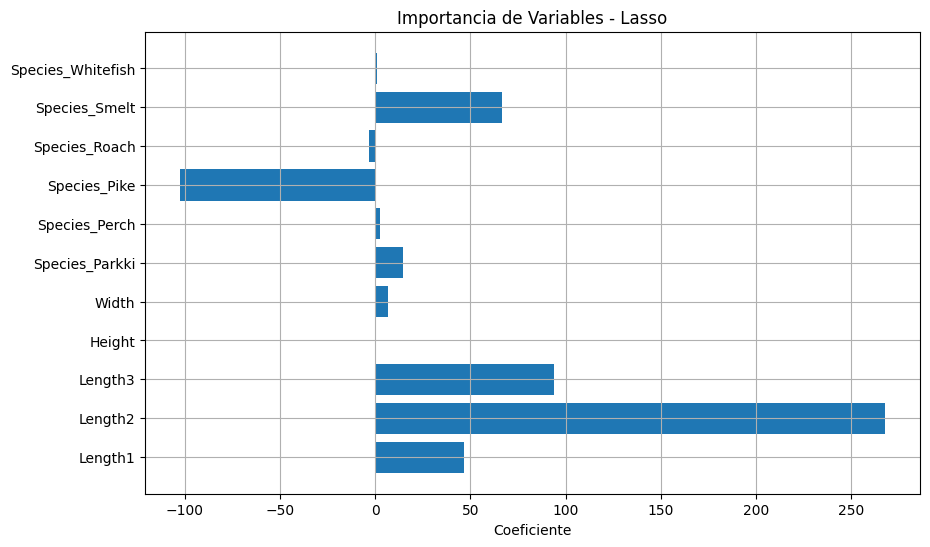

📊 RIDGE - MSE: 7033.27


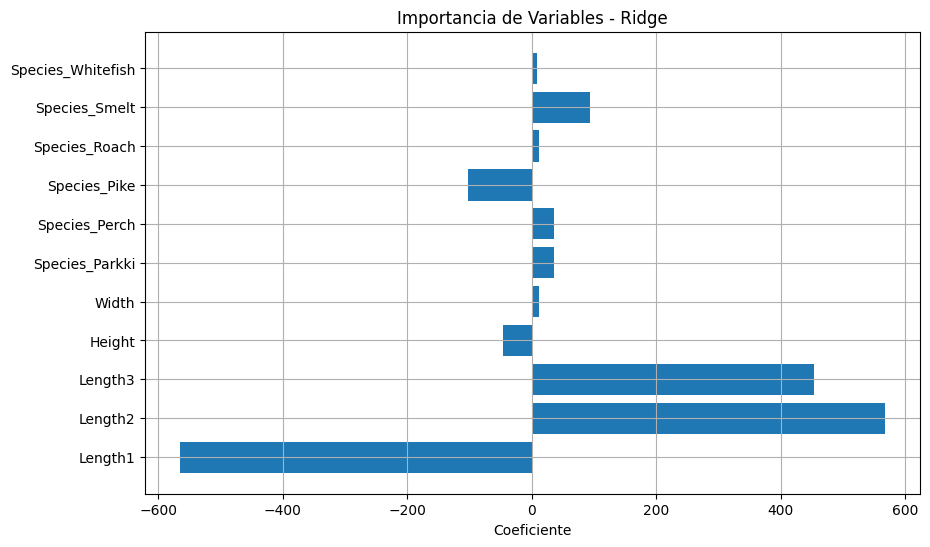

📊 ELASTICNET - MSE: 7495.46


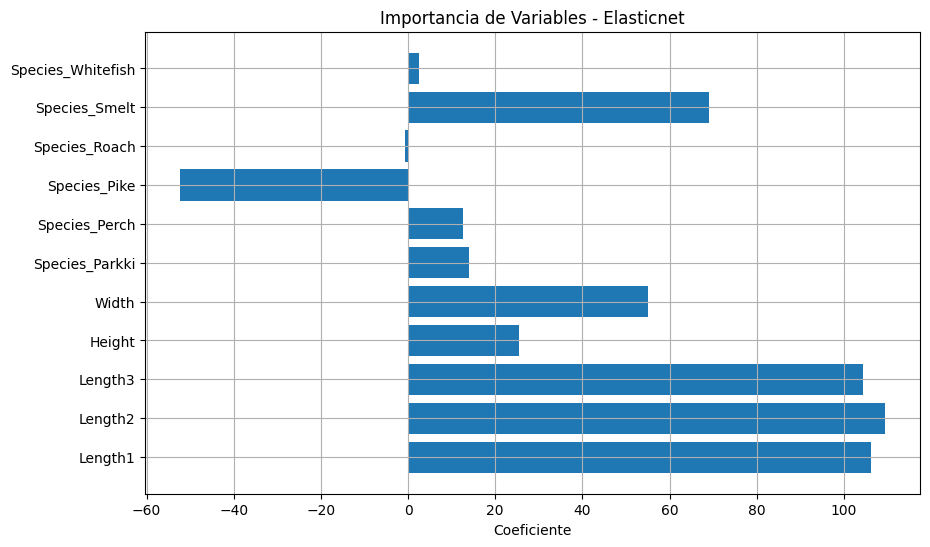

In [13]:
modelos = {
    "lasso": Lasso(alpha=1.0),
    "ridge": Ridge(alpha=0.001),
    "elasticnet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"📊 {nombre.upper()} - MSE: {mse:.2f}")

    # Gráfico de coeficientes
    coef = modelo.coef_
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, coef)
    plt.title(f"Importancia de Variables - {nombre.capitalize()}")
    plt.xlabel("Coeficiente")
    plt.grid(True)
    plt.show()


/home/mparraf/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


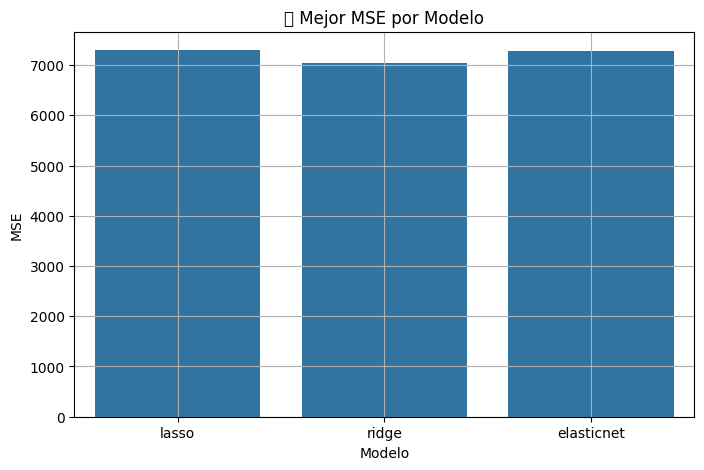

/home/mparraf/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


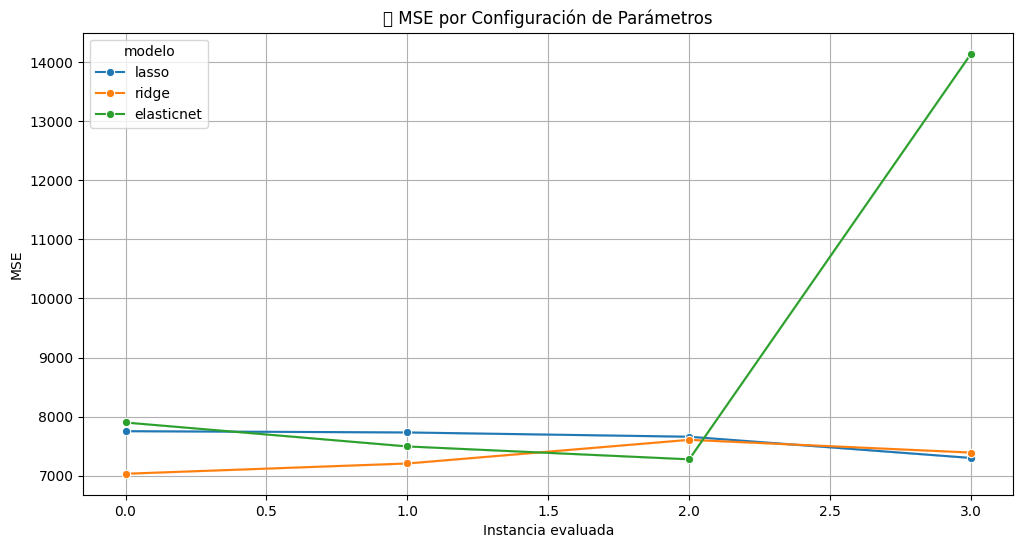

In [15]:
df_mejores = pd.read_csv("../outputs/resultados_gridsearch.csv")
df_todas = pd.read_csv("../outputs/todas_las_instancias.csv")

# Gráfico de mejores modelos
plt.figure(figsize=(8,5))
sns.barplot(data=df_mejores, x="modelo", y="mejor_mse")
plt.title("📉 Mejor MSE por Modelo")
plt.ylabel("MSE")
plt.xlabel("Modelo")
plt.grid(True)
plt.show()

# Gráfico de todas las instancias
plt.figure(figsize=(12,6))
sns.lineplot(data=df_todas, x="instancia", y="mse", hue="modelo", marker="o")
plt.title("📊 MSE por Configuración de Parámetros")
plt.xlabel("Instancia evaluada")
plt.ylabel("MSE")
plt.grid(True)
plt.show()
